<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Plotting_with_geopandas_geoplot_mapclassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we’ll load in the data using GeoPandas using some sample datasets

In [ ]:
!pip install geopandas
!pip install geoplot

In [1]:
import geopandas as gpd
import geoplot as gplt

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
boroughs = gpd.read_file(
    gplt.datasets.get_path('nyc_boroughs')
)
collisions = gpd.read_file(
    gplt.datasets.get_path('nyc_injurious_collisions')
)

Let us try out the basic plotting function from the geoplot library

1. Plot all countries in the world

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


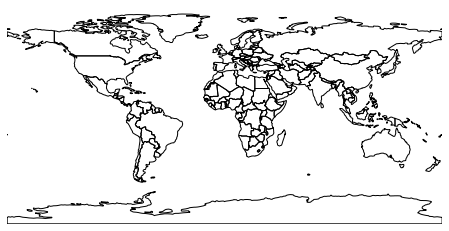

In [2]:
gplt.polyplot(world, figsize=(8, 4))

2. Plot the boundary of all bouroughs in New York City

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


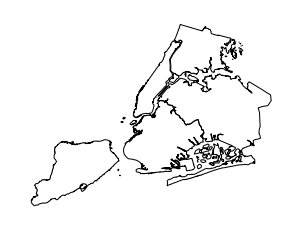

In [3]:
gplt.polyplot(boroughs, figsize=(8, 4))

3. Plot the points where collisions happened in New York city.

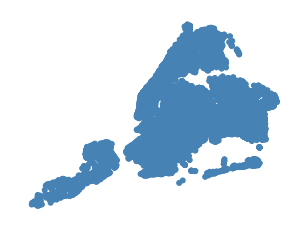

In [4]:
gplt.pointplot(collisions, figsize=(8, 4))

4. Overlay the boundary of the boroughs with collision points in the same plot

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


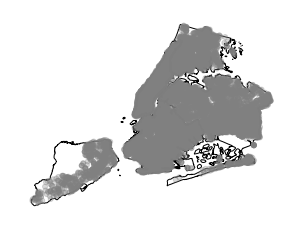

In [5]:
ax1 = gplt.pointplot(collisions, figsize = (8,4),alpha = 0.3, color = "gray")
gplt.polyplot(boroughs, ax = ax1)

'mapclassify' is another visualization library

In [1]:
!pip install mapclassify

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


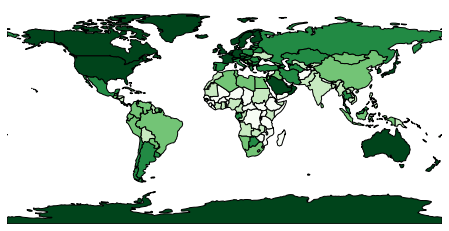

In [4]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
gplt.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)

If you want to use size as a visual variable, use a cartogram. Here are population estimates for countries in Africa.

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1233: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in scaled_polygon:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


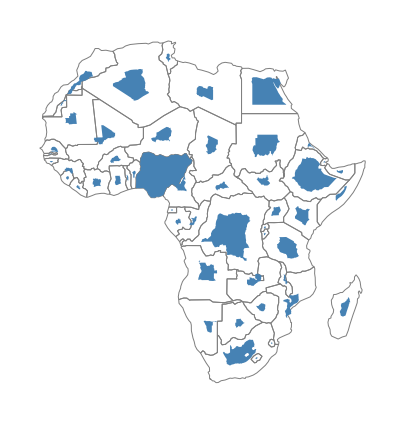

In [5]:
africa = world.query('continent == "Africa"')
ax = gplt.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
gplt.polyplot(africa, edgecolor='gray', ax=ax)

From the sample dataframe 'world' that we loaded before, let us try to create a choropleth map wiht population estimates for each country.

In [2]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


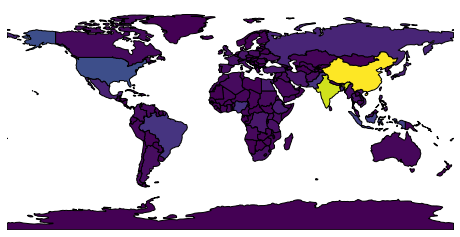

In [2]:
gplt.choropleth(world, hue = world['pop_est'])

We can change the color scheme from orange to red as a gradient using a color map functionality with 'cmap' attribute.

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


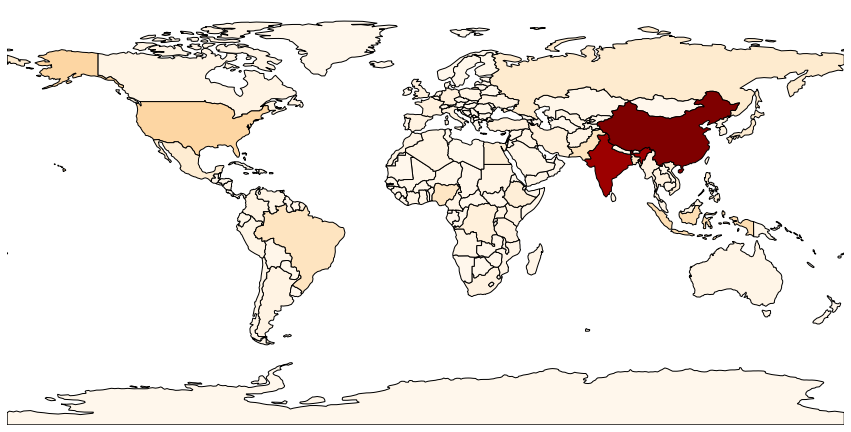

In [3]:
gplt.choropleth(world, hue = world['pop_est'],cmap = 'OrRd', figsize = (15,10))

Now, let's try a single color but with a gradient from light to dark

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


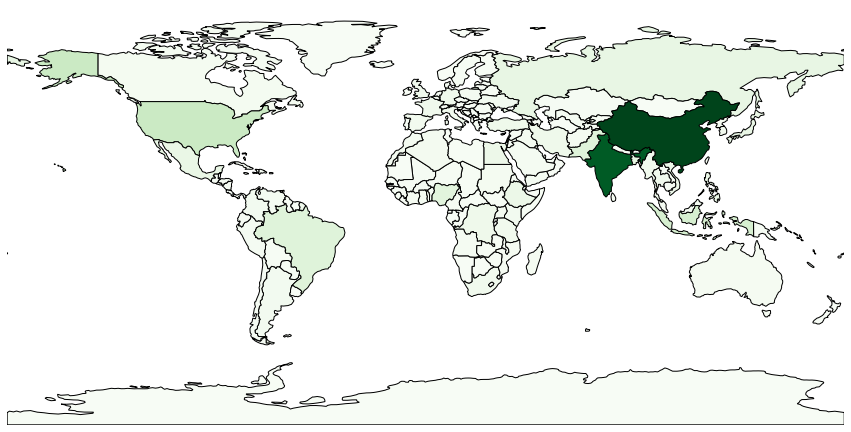

In [5]:
gplt.choropleth(world, hue = world['pop_est'],cmap = 'Greens', figsize = (15,10))

Let us now load another sample dataset from geopandas on new york census tracts, create a columns 'percent_white' which will store the percentage of white residents in each census tract and then plot a chorpleth map with that variable.

Text(0.5, 1.0, 'Percentage White Residents, 2000')

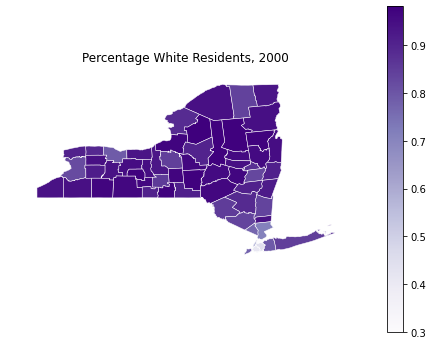

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

#Read data
ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
#Assign a value of %White residents to a variable 
ny_census_tracts['percent_white'] = ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']


#Using geoplot library plot a choropleth map with the new variable
gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white',
    legend=True
)
plt.title("Percentage White Residents, 2000")

Let us try another example with parking tickets issued for each borough in New York city.

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will b

Text(0.5, 1.0, 'Connecticut (n=126,661)')

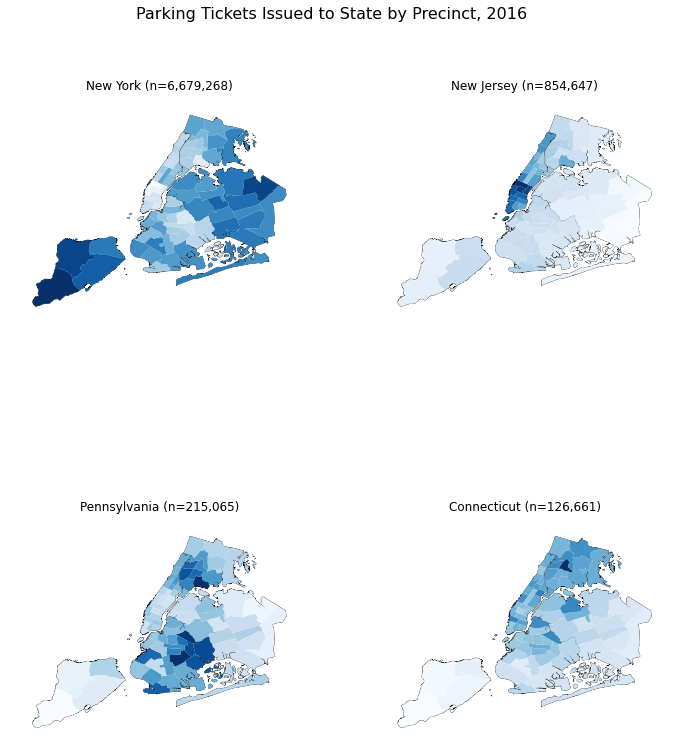

In [14]:
# load the data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
tickets = gpd.read_file(gplt.datasets.get_path('nyc_parking_tickets'))

#proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)


def plot_state_to_ax(state, ax):
    gplt.choropleth(
        tickets.set_index('id').loc[:, [state, 'geometry']],
        hue=state, cmap='Blues',
        linewidth=0.0, ax=ax
    )
    gplt.polyplot(
        nyc_boroughs, edgecolor='black', linewidth=0.5, ax=ax
    )


f, axarr = plt.subplots(2, 2, figsize=(12, 13))

plt.suptitle('Parking Tickets Issued to State by Precinct, 2016', fontsize=16)
plt.subplots_adjust(top=0.95)

plot_state_to_ax('ny', axarr[0][0])
axarr[0][0].set_title('New York (n=6,679,268)')

plot_state_to_ax('nj', axarr[0][1])
axarr[0][1].set_title('New Jersey (n=854,647)')

plot_state_to_ax('pa', axarr[1][0])
axarr[1][0].set_title('Pennsylvania (n=215,065)')

plot_state_to_ax('ct', axarr[1][1])
axarr[1][1].set_title('Connecticut (n=126,661)')

Now, let us try a cartogram plot with obesity rates of all states in USA

Text(0.5, 1.0, 'Adult Obesity Rate by State, 2013')

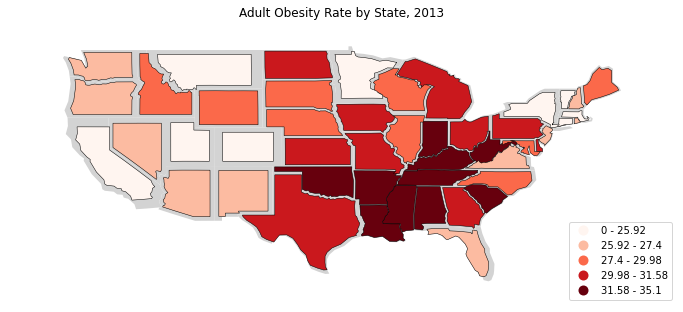

In [15]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mapclassify as mc

# load the data
obesity_by_state = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa['Obesity Rate'] = contiguous_usa['state'].map(
    lambda state: obesity_by_state.query("State == @state").iloc[0]['Percent']
)
scheme = mc.Quantiles(contiguous_usa['Obesity Rate'], k=5)


ax = gplt.cartogram(
    contiguous_usa,
    scale='Obesity Rate', limits=(0.75, 1),
    hue='Obesity Rate', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(12, 7)
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='None', ax=ax)

plt.title("Adult Obesity Rate by State, 2013")